## The purpose of this notebook is to predict the Human Development Index for each nation in the next 5 years, better than a baseline guess. Baseline guesses assign a HDI value to a nation's next 5 years based on it's HDI performance in the last 5 years.

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [43]:
import plotly.express as px

In [44]:
train = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/train_github.csv')
val = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/val_github.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ddodds42/DS_Unit_2_Build_DAVID_DODDS/master/test_github.csv')

## Columns named T_HDI_ are targets measuring the Human Development Index for a nation state in the next 5 years. T_HDI_mean is the mean of the HDI in the next 5 years, a value from 0 to 1, 1 being highest level of human development, and 0 being the lowest. It is a continuous variable that must be regressed. T_HDI_Trend is also a continuous variable, representing the slope of the best fit trendline for the growth (or negative growth) of a nation's HDI in the next 5 years.

In [45]:
train.columns

Index(['NS_code_from_gini', 'Nation_State', 'T_HDI_Mean_plus_5',
       'T_HDI_Trend_plus_5', 'T_State_Fail_yr_1', 'T_State_Fail_plus_5',
       'T_State_Fail_yr_5', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4'],
      dtype='object')

In [46]:
features = ['NS_code_from_gini', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4']
target = 'T_HDI_Trend_plus_5'

In [47]:
X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

In [48]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)
X_test_enc = encoder.transform(X_test)

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train_enc, y_train)
y_pred_train = model.predict(X_train_enc)
train_rmse = (mean_squared_error(y_train, y_pred_train))**0.5

y_pred_val = model.predict(X_val_enc)
val_rmse = (mean_squared_error(y_val, y_pred_val))**0.5

train_rmse, val_rmse

(0.0038986284876035295, 0.004283424284520843)

## ^^ Multiple regression with all features beats baseline for predicting the HDI Trend (prosperity growth) of the next 5 years.

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

In [52]:
selector = SelectKBest(score_func=f_regression, k='all')
X_train_select = selector.fit_transform(X_train_enc, y_train)
X_val_select = selector.transform(X_val_enc)
X_train_select.shape, X_val_select.shape

((3238, 14), (695, 14))

In [53]:
# For Val set

for k in range(1, len(X_train.columns)+1):
  print(f'{k} features:')

  selector = SelectKBest(score_func=f_regression, k=k)
  X_train_select = selector.fit_transform(X_train_enc, y_train)
  X_val_select = selector.transform(X_val_enc)

  model = LinearRegression()
  model.fit(X_train_select, y_train)
  y_pred = model.predict(X_val_select)
  rmse = (mean_squared_error(y_val, y_pred))**0.5
  print(f'Val rmse = {rmse} \n')

1 features:
Val rmse = 0.0042837234681400715 

2 features:
Val rmse = 0.00428096818194612 

3 features:
Val rmse = 0.004280836996587156 

4 features:
Val rmse = 0.004274349556968233 

5 features:
Val rmse = 0.004277890649460947 

6 features:
Val rmse = 0.004277982532160086 

7 features:
Val rmse = 0.004278777291598398 

8 features:
Val rmse = 0.004280949008836787 

9 features:
Val rmse = 0.004281365379496371 

10 features:
Val rmse = 0.004281539099530139 

11 features:
Val rmse = 0.004283842816813121 

12 features:
Val rmse = 0.004284312094287293 

13 features:
Val rmse = 0.004283430955818824 

14 features:
Val rmse = 0.004283424284520843 



In [54]:
# k=4, 0.004274349557657845

In [55]:
X_train_enc.columns

Index(['NS_code_from_gini', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4'],
      dtype='object')

In [56]:
importances = []

for col in X_train_enc.columns:
    X_train_drop = X_train_enc.drop(columns = col)
    X_val_drop = X_val_enc.drop(columns = col)
    
    model.fit(X_train_drop, y_train)
    y_pred_val = model.predict(X_val_drop)
    val_drop_rmse = (mean_squared_error(y_val, y_pred_val))**0.5

    dci = val_drop_rmse - val_rmse
    importances.append(dci)
    
importances

[6.671297981056257e-09,
 5.86780649405351e-06,
 2.9990400949248333e-06,
 -2.839935543175187e-06,
 -1.0549676104990025e-06,
 -6.042923564415423e-07,
 -1.3670514841506581e-06,
 -4.5505252433634263e-07,
 -9.243690453873687e-07,
 -3.4491208623747827e-07,
 2.88987272977978e-07,
 -1.3873577517850566e-06,
 -4.009877592383443e-08,
 8.921758171158076e-07]

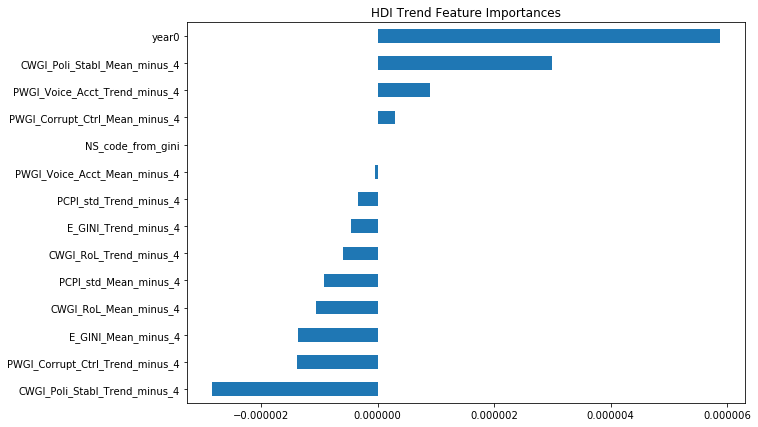

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

importante = pd.Series(importances, X_train_enc.columns)

n = 14
plt.figure(figsize=(10, n/2))
plt.title(f'HDI Trend Feature Importances')
importante.sort_values().plot.barh();

## ^^ Only the top 4 features improve a multiple regression to predict the next 5 years of HDI change: the year, the mean political stablity index, the mean voice and accountability index, and the mean corruption control index.

In [58]:
selector = SelectKBest(score_func=f_regression, k=4)
X_train_select = selector.fit_transform(X_train_enc, y_train)
X_val_select = selector.transform(X_val_enc)
X_train_select.shape, X_val_select.shape

((3238, 4), (695, 4))

In [59]:
selected_mask = selector.get_support()
all_names = X_train.columns
selected_names = all_names[selected_mask]
excluded_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
  print(name)

print('\n Features excluded:')
for name in excluded_names:
  print(name)

Features selected:
year0
CWGI_Poli_Stabl_Mean_minus_4
CWGI_RoL_Mean_minus_4
PWGI_Corrupt_Ctrl_Mean_minus_4

 Features excluded:
NS_code_from_gini
CWGI_Poli_Stabl_Trend_minus_4
CWGI_RoL_Trend_minus_4
E_GINI_Mean_minus_4
E_GINI_Trend_minus_4
PCPI_std_Mean_minus_4
PCPI_std_Trend_minus_4
PWGI_Corrupt_Ctrl_Trend_minus_4
PWGI_Voice_Acct_Mean_minus_4
PWGI_Voice_Acct_Trend_minus_4


## ^^ PREDICTING T_HDI_Trend_plus_5 using SelectKBest. The best Validation RMSE I am able to get with SelectKBest, with an optimal number of features at k=4, is 0.00427435. That's just over 12% better than the baseline. ^^

In [60]:
from sklearn.linear_model import RidgeCV, Ridge

In [61]:
target0 = 'T_HDI_Mean_plus_5'

In [62]:
y_train0 = train[target0]
y_val0 = val[target0]
y_test0 = test[target0]

In [63]:
model = LinearRegression()

model.fit(X_train_enc, y_train0)
y_pred_train = model.predict(X_train_enc)
train0_rmse = (mean_squared_error(y_train0, y_pred_train))**0.5

y_pred_val = model.predict(X_val_enc)
val0_rmse = (mean_squared_error(y_val0, y_pred_val))**0.5

train0_rmse, val0_rmse

(0.10354308052273917, 0.10267894930042742)

In [64]:
selector = SelectKBest(score_func=f_regression, k='all')
X_train_select0 = selector.fit_transform(X_train_enc, y_train0)
X_val_select0 = selector.transform(X_val_enc)
X_train_select0.shape, X_val_select0.shape

((3238, 14), (695, 14))

In [65]:
# For Val set

for k in range(1, len(X_train.columns)+1):
  print(f'{k} features, HDI mean:')

  selector = SelectKBest(score_func=f_regression, k=k)
  X_train_select = selector.fit_transform(X_train_enc, y_train0)
  X_val_select = selector.transform(X_val_enc)

  model = LinearRegression()
  model.fit(X_train_select, y_train0)
  y_pred = model.predict(X_val_select)
  rmse = (mean_squared_error(y_val0, y_pred))**0.5
  print(f'Val rmse = {rmse} \n')

1 features, HDI mean:
Val rmse = 0.11813724220625763 

2 features, HDI mean:
Val rmse = 0.11747536071415178 

3 features, HDI mean:
Val rmse = 0.11855806447395206 

4 features, HDI mean:
Val rmse = 0.11475779170262079 

5 features, HDI mean:
Val rmse = 0.11450784032707413 

6 features, HDI mean:
Val rmse = 0.1099749593799776 

7 features, HDI mean:
Val rmse = 0.1099239589413009 

8 features, HDI mean:
Val rmse = 0.10406082795134684 

9 features, HDI mean:
Val rmse = 0.10338289918718797 

10 features, HDI mean:
Val rmse = 0.10339216356474426 

11 features, HDI mean:
Val rmse = 0.10308588044057747 

12 features, HDI mean:
Val rmse = 0.10262130123525222 

13 features, HDI mean:
Val rmse = 0.10269520796062523 

14 features, HDI mean:
Val rmse = 0.10267894930042742 



In [66]:
# k=12 features, rmse=0.10262130124074219

In [67]:
for x in [-0.0032, -0.00325, -0.0033, -0.0034, -0.0035]:
  print(f'Ridge Regression, alpha = {x}')
  model = Ridge(alpha=x, normalize=True)
  model.fit(X_train_select, y_train0)
  y_pred = model.predict(X_val_select)

  rmse = (mean_squared_error(y_val0, y_pred))**0.5
  print(f'Validation RMSE: {rmse} \n')

Ridge Regression, alpha = -0.0032
Validation RMSE: 0.10267620186412724 

Ridge Regression, alpha = -0.00325
Validation RMSE: 0.10267619990528108 

Ridge Regression, alpha = -0.0033
Validation RMSE: 0.10267619933194924 

Ridge Regression, alpha = -0.0034
Validation RMSE: 0.10267620236640675 

Ridge Regression, alpha = -0.0035
Validation RMSE: 0.10267621101695239 



## ^^ PREDICTING T_HDI_Mean_plus_5 using SelectKBest. The best Validation RMSE I am able to get with SelectKBest, with an optimal number of features at k=12, is 0.10262130124074219. That's more than 3 times worse than the baseline. Ridge Regression was unable to improve the score.

In [68]:
selector = SelectKBest(score_func=f_regression, k=12)
X_train_select = selector.fit_transform(X_train_enc, y_train0)
X_val_select = selector.transform(X_val_enc)

model = LinearRegression()
model.fit(X_train_select, y_train0)
y_pred = model.predict(X_val_select)
rmse = (mean_squared_error(y_val0, y_pred))**0.5
print(f'Val rmse = {rmse} \n')

Val rmse = 0.10262130123525222 



In [69]:
model = LinearRegression()
importances0 = []

for col in X_train_enc.columns:
    X_train_drop = X_train_enc.drop(columns = col)
    X_val_drop = X_val_enc.drop(columns = col)
    
    model.fit(X_train_drop, y_train0)
    y_pred_val = model.predict(X_val_drop)
    val_drop_rmse = (mean_squared_error(y_val0, y_pred_val))**0.5

    dci = val_drop_rmse - val0_rmse
    importances0.append(dci)
    
importances0

[0.00027227305478971786,
 0.00680453033138545,
 0.0005495629642275623,
 -6.421815913999762e-05,
 0.0025117067403495202,
 0.000313606992412091,
 0.0033418778890554474,
 0.000567306102541909,
 0.0009133325860845587,
 6.067351776983809e-05,
 0.00012384565725291619,
 1.625866019780431e-05,
 -0.0006356535498365096,
 5.371596780689991e-05]

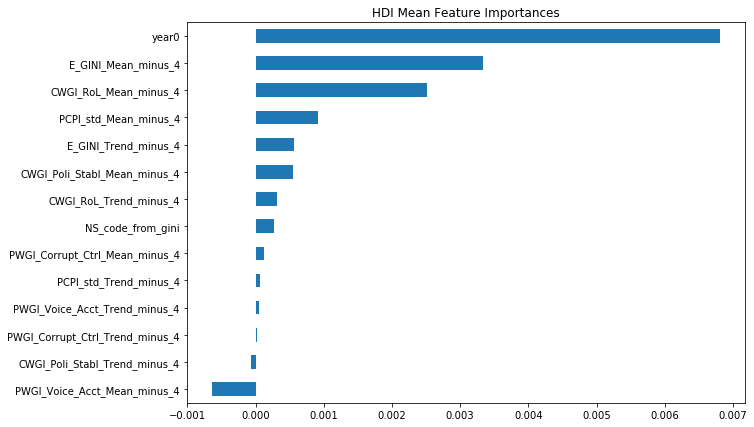

In [70]:
%matplotlib inline

importante0 = pd.Series(importances0, X_train_enc.columns)

n = 14
plt.figure(figsize=(10, n/2))
plt.title(f'HDI Mean Feature Importances')
importante0.sort_values().plot.barh();

## This next cell downloads the feature importances into an excel file for feature importance analysis accross the 5 targets.

In [71]:
# fia_hdi_trend = pd.DataFrame(importante.sort_values(ascending=False))
# fia_hdi_trend.to_excel('fia_trend.xlsx')

# fia_hdi_mean = pd.DataFrame(importante0.sort_values(ascending=False))
# fia_hdi_mean.to_excel('fia_mean.xlsx')